In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,confusion_matrix,accuracy_score,confusion_matrix


In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Gender,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df["PassengerId"].nunique()

891

In [6]:
df["Name"].nunique()

891

In [7]:
df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

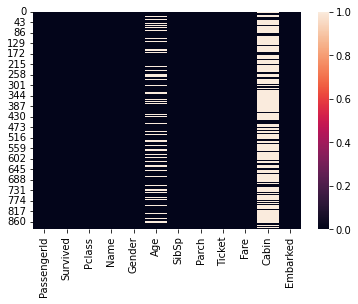

In [11]:
sns.heatmap(df.isnull())

<AxesSubplot: >

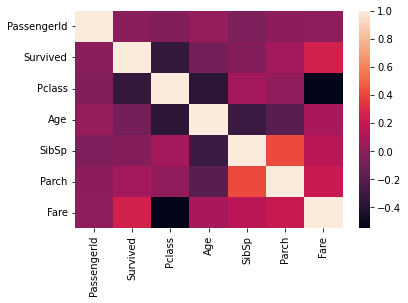

In [12]:
sns.heatmap(df.corr())

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# drop columns
column_list = ["PassengerId","Name","Ticket","Cabin"]
df.drop(column_list,axis = 1,inplace = True)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
df["Gender"].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [16]:
# Encoding
df["Gender"] =df["Gender"].map({"male":0,"female":1})
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [17]:
df["Age"].isna().sum()

177

In [18]:
df["Age"].mean()

29.69911764705882

In [19]:
df["Age"].median()

28.0

In [20]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Age"]=df["Age"].astype(int)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S
887,1,1,1,19,0,0,30.0000,S
888,0,3,1,29,1,2,23.4500,S
889,1,1,0,26,0,0,30.0000,C


In [21]:
df["Age"].isna().sum()

0

<AxesSubplot: >

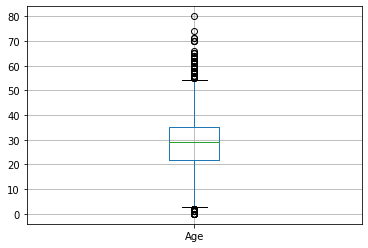

In [22]:
df[["Age"]].boxplot()
#this is not count as oultlier because age is likely in between 0 to 100

In [23]:
# child count
df[df["Age"]<=5].shape

(44, 8)

In [24]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S
3,1,1,1,35,1,0,53.1000,S
4,0,3,0,35,0,0,8.0500,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 52.3+ KB


In [26]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [27]:
df["Fare"].isna().sum()

0

<AxesSubplot: >

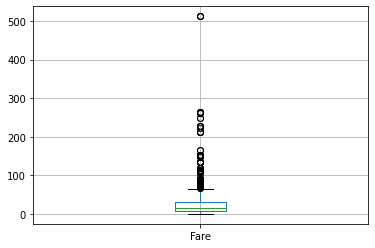

In [28]:
df[["Fare"]].boxplot()

In [29]:
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + 1.5*IQR
df["Fare"]  = np.where(df["Fare"]>upper_limit,upper_limit,df["Fare"])


<AxesSubplot: >

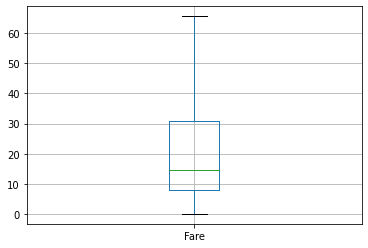

In [30]:
df[["Fare"]].boxplot()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 52.3+ KB


In [32]:
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [33]:
df = pd.get_dummies(df,columns=["Embarked"])
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,0,0,1
1,1,1,1,38,1,0,65.6344,1,0,0
2,1,3,1,26,0,0,7.9250,0,0,1
3,1,1,1,35,1,0,53.1000,0,0,1
4,0,3,0,35,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,0,1
887,1,1,1,19,0,0,30.0000,0,0,1
888,0,3,1,29,1,2,23.4500,0,0,1
889,1,1,0,26,0,0,30.0000,1,0,0


### feature selection

In [34]:
x = df.drop("Survived",axis = 1)
y = df["Survived"]

### splittiing

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [36]:
y_train.value_counts(normalize=True)
# it shows data is balance

0    0.613764
1    0.386236
Name: Survived, dtype: float64

In [37]:
from sklearn.preprocessing import RobustScaler
scaler  = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [38]:
x_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.        , -1.        ],
       [ 0.        ,  0.        , -0.0754717 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.        ,  1.        ,  2.03773585, ...,  1.        ,
         0.        , -1.        ],
       ...,
       [-1.        ,  1.        ,  0.0754717 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.        ,  1.        ,  0.1509434 , ...,  1.        ,
         0.        , -1.        ],
       [-1.        ,  1.        , -0.30188679, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
x_test

array([[-2.        ,  1.        , -1.05660377, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.        ,  1.        , -0.52830189, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        , -0.45283019, ...,  1.        ,
         0.        , -1.        ]])

# Model building

### Logistic Regressin

In [40]:
Log_model = LogisticRegression()
Log_model.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = Log_model.predict(x_test)

In [42]:
from sklearn.metrics import f1_score

In [43]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [44]:
result = pd.DataFrame([["Logistic Regression",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.78125,0.724638,0.75188


In [45]:
confusion_matrix(y_test,y_pred)

array([[96, 14],
       [19, 50]], dtype=int64)

### KNN

In [46]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn_model.predict(x_test)

In [48]:
from sklearn.metrics import f1_score

In [49]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [50]:
knn_result = pd.DataFrame([["KNN Regression",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(knn_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.75188
0,KNN Regression,0.759777,0.732143,0.594203,0.65600


In [51]:
confusion_matrix(y_test,y_pred)

array([[95, 15],
       [28, 41]], dtype=int64)

### Decision Tree

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred = dt_model.predict(x_test)

In [48]:
from sklearn.metrics import f1_score

In [54]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [55]:
dt_result = pd.DataFrame([["Decision Tree ",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(dt_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647


In [56]:
confusion_matrix(y_test,y_pred)

array([[88, 22],
       [21, 48]], dtype=int64)

### Random Forest

In [57]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred = rf_model.predict(x_test)

In [59]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [60]:
rf_result = pd.DataFrame([["Random Forest",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(rf_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121


In [61]:
confusion_matrix(y_test,y_pred)

array([[94, 16],
       [22, 47]], dtype=int64)

### Adaboost

In [62]:
ad_model = AdaBoostClassifier()
ad_model.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
y_pred = ad_model.predict(x_test)

In [64]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [65]:
ad_result = pd.DataFrame([["Adaboost classifier",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(ad_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121
0,Adaboost classifier,0.782123,0.734375,0.681159,0.706767


In [66]:
confusion_matrix(y_test,y_pred)

array([[93, 17],
       [22, 47]], dtype=int64)

### SVM

In [67]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [68]:
y_pred = svm_model.predict(x_test)

In [69]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [70]:
sv_result = pd.DataFrame([["SVM Classifier",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(sv_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121
0,Adaboost classifier,0.782123,0.734375,0.681159,0.706767
0,SVM Classifier,0.793296,0.785714,0.637681,0.704000


In [71]:
confusion_matrix(y_test,y_pred)

array([[98, 12],
       [25, 44]], dtype=int64)

### naive bayes

In [73]:
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)

GaussianNB()

In [74]:
y_pred = naive_model.predict(x_test)

In [75]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [76]:
nv_result = pd.DataFrame([["Naive Classifier",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(nv_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121
0,Adaboost classifier,0.782123,0.734375,0.681159,0.706767
0,SVM Classifier,0.793296,0.785714,0.637681,0.704000
0,Naive Classifier,0.776536,0.698630,0.739130,0.718310


In [77]:
confusion_matrix(y_test,y_pred)

array([[88, 22],
       [18, 51]], dtype=int64)

### XGBOOST

In [78]:
from xgboost import XGBClassifier

In [79]:
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
y_pred = xg_model.predict(x_test)

In [81]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [82]:
xg_result = pd.DataFrame([["XGBoost Classifier",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(xg_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121
0,Adaboost classifier,0.782123,0.734375,0.681159,0.706767
0,SVM Classifier,0.793296,0.785714,0.637681,0.704000
0,Naive Classifier,0.776536,0.698630,0.739130,0.718310
0,XGBoost Classifier,0.765363,0.736842,0.608696,0.666667


In [83]:
confusion_matrix(y_test,y_pred)

array([[95, 15],
       [27, 42]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       110
           1       0.74      0.61      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



##### we finalise Logistic regression of hyperparameter tuning

In [87]:
list1 = list(range(0,15,1))
lr_model = LogisticRegression()
param_grid = {"penalty":['l1', 'l2', 'elasticnet', 'none'],
              "multi_class":['auto', 'ovr', 'multinomial'],
              "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "random_state":list1}

In [88]:
from sklearn.model_selection import RandomizedSearchCV
rscv_model = RandomizedSearchCV(lr_model,param_grid,cv = 5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [89]:
y_pred = rscv_model.predict(x_test)

In [90]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [91]:
lo_result = pd.DataFrame([["Tunned Logistic model",acc,pre,rec,f1]],
                     columns=["Model","Accuracy","Precision","Recall","F1-Score"])
result = result.append(lo_result)
result

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815642,0.781250,0.724638,0.751880
0,KNN Regression,0.759777,0.732143,0.594203,0.656000
0,Decision Tree,0.759777,0.685714,0.695652,0.690647
0,Random Forest,0.787709,0.746032,0.681159,0.712121
0,Adaboost classifier,0.782123,0.734375,0.681159,0.706767
0,SVM Classifier,0.793296,0.785714,0.637681,0.704000
0,Naive Classifier,0.776536,0.698630,0.739130,0.718310
0,XGBoost Classifier,0.765363,0.736842,0.608696,0.666667
0,Tunned Logistic model,0.804469,0.765625,0.710145,0.736842


In [92]:
confusion_matrix(y_test,y_pred)

array([[95, 15],
       [20, 49]], dtype=int64)